<a href="https://colab.research.google.com/github/alibekk93/GK_evaluation/blob/main/GK_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [24]:
# essential ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
!pip install requests_html

In [62]:
import requests
from requests_html import HTMLSession
from bs4 import BeautifulSoup

In [226]:
def convert_age(str_age:str) -> float:
  """Converts age of FBRef format into float, e.g. '12-345' to 12.945
  """

  years, days = (float(s) for s in str_age.split('-'))
  days /= 365
  return years + days

In [74]:
session = HTMLSession()

In [312]:
# get html
r = session.get('https://fbref.com/en/comps/Big5/keepersadv/players/Big-5-European-Leagues-Stats')
soup = BeautifulSoup(r.html.raw_html)
# find table and process data into dataframe
table = soup.findAll('table')[0]
headers = table.find('thead').findAll('tr')[1].text.split('\n')[2:-1]
rows = table.find('tbody').findAll('tr')
data = [r.findAll('td') for r in rows]
data = pd.DataFrame(np.array([row[col].text for row in data for col in range(len(row))]).reshape(-1, 34), columns=headers)
# renaming some columns for better aestetics
data.columns = ['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'Played90s', 'GA',
                'PKA', 'FK', 'CK', 'OG', 'PSxG', 'PSxG_perSoT', 'PSxG_diff', 'PSxG_diff_per90', 'Cmp',
                'Att', 'Cmp_p', 'PassAtt', 'PassThr', 'PassLaunch_p', 'PassAvgLen', 'GKAtt', 'GKLaunch_p',
                'GKAvgLen', 'CrossAtt', 'CrossStp', 'CrossStp%', 'nOPA', 'nOPA/90', 'AvgDistOPA', 'Matches']
# convert data
data.Age = data.Age.apply(convert_age)
NUMERIC = ['Age', 'Born', 'Played90s', 'GA', 'PKA', 'FK', 'CK', 'OG', 'PSxG', 'PSxG_perSoT', 'PSxG_diff',
           'PSxG_diff_per90', 'Cmp', 'Att', 'Cmp_p', 'PassAtt', 'PassThr', 'PassLaunch_p', 'PassAvgLen',
           'GKAtt', 'GKLaunch_p', 'GKAvgLen', 'CrossAtt', 'CrossStp', 'CrossStp%', 'nOPA', 'nOPA/90', 'AvgDistOPA']
for col in NUMERIC:
  data[col] = pd.to_numeric(data[col], errors='coerce')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


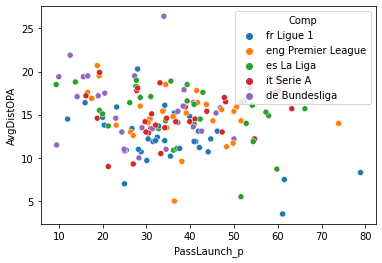

In [314]:
sns.scatterplot(data.PassLaunch_p, data.AvgDistOPA, hue=data.Comp)